<a href="https://colab.research.google.com/github/caverar/TIA_2022/blob/yolo/yoloColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOV5 Test for ANPR

## Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/.shortcut-targets-by-id/1edgNojlLOleZ4zhRd2ZrFPKL2WDJd3Us/Colab

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1edgNojlLOleZ4zhRd2ZrFPKL2WDJd3Us/Colab


## Download YOLOV5

In [3]:
!sudo apt install -y git
!sudo apt update && sudo apt upgrade
!sudo apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bi

In [4]:
#%rm -rf yolov5
#!git clone https://github.com/ultralytics/yolov5  # clone

!pip install -r yolov5/requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 5.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 55.8 MB/s 


## Pre-processing
### COCO File

In [19]:
!cat ./coco.yaml

train: ../dataset/images/train/
val: ../dataset/images/val/


# Classes
nc: 1  # number of classes
names: [ "plate" ]  # class names




### File paths

In [6]:
from glob import glob

path = "/content/gdrive/.shortcut-targets-by-id/1edgNojlLOleZ4zhRd2ZrFPKL2WDJd3Us/Colab/"

print("Validation:")
image_paths = glob(path+'dataset/images/val/*.jpg', recursive=True)
print("Images:", len(image_paths))

label_paths = glob(path+'dataset/labels/val/*.txt', recursive=True)
print("Labels:", len(label_paths))

print()


print("Training:")
image_paths = glob(path+'dataset/images/train/*.jpg', recursive=True)
print("Images:", len(image_paths))

label_paths = glob(path+'dataset/labels/train/*.txt', recursive=True)
print("Labels:", len(label_paths))

Validation:
Images: 897
Labels: 897

Training:
Images: 8069
Labels: 8069


## Train

In [ ]:
!python ./yolov5/train.py --img 480 --batch-size -1 --epochs 50 --data coco.yaml --weights yolov5x.pt --cache

train: weights=yolov5x.pt, cfg=, data=coco.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=-1, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

## Test

In [7]:
import torch

# Model
model = torch.hub.load('yolov5', 'custom', path=path+"yolov5/runs/train/exp/weights/best.pt", source='local')


YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


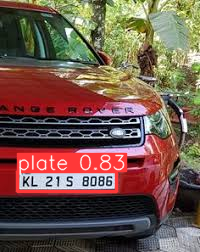

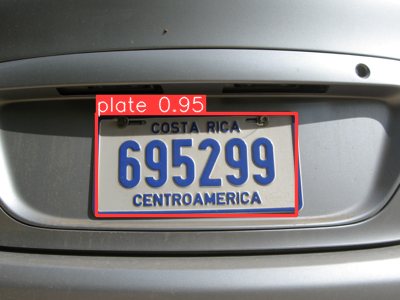

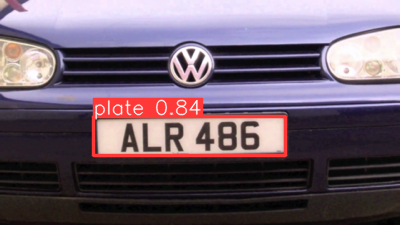

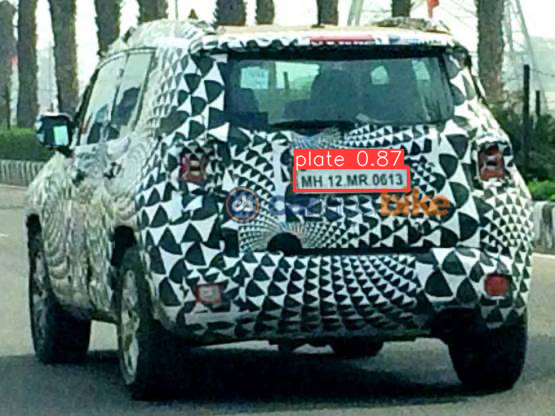

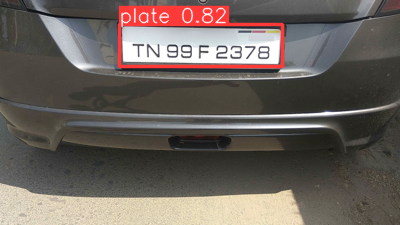

In [13]:
import cv2
from random import sample

image_paths = glob(path+'own/Fig/*.png', recursive=True)

for ip in sample(image_paths,5):
    image = cv2.imread(ip)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model(image, size=480)
    results.show()

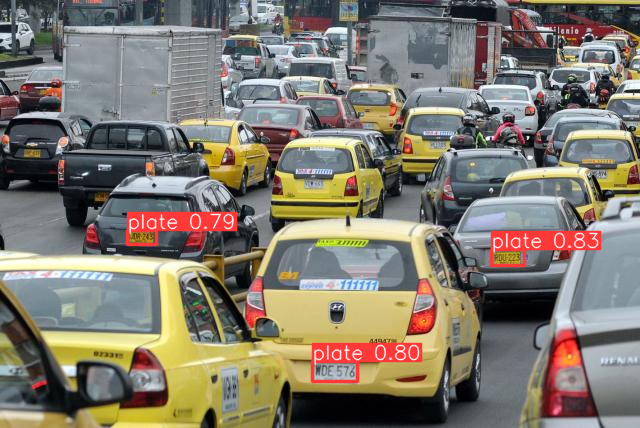

In [15]:
image = cv2.imread(path+'own/trafico.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model(image)
results.show()